In [11]:
#Import Required Modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Load Pre-Processed Train / Test Data

train_df = pd.read_csv('Train-Data.csv')
test_df = pd.read_csv('Test-Data.csv')

print(f'Train Length: {len(train_df)}, Test Length: {len(test_df)}')

Train Length: 1760, Test Length: 440


In [3]:
#Prepare Data For ML input
trainx = train_df.iloc[:,:-1].values.tolist()
trainy = train_df['label'].tolist()

testx = test_df.iloc[:,:-1].values.tolist()
testy = test_df['label'].tolist()

In [4]:
#Validate Correct Input Shapes
print(f'Trainx: {len(trainx)}, Trainy: {len(trainy)}')
print(f'Testx: {len(testx)}, Testy: {len(testy)}')

Trainx: 1760, Trainy: 1760
Testx: 440, Testy: 440


In [5]:
#Encode Classification Labels
le = LabelEncoder()

le.fit(trainy)

trainy = le.transform(trainy)
testy = le.transform(testy)

In [6]:
#Support Vector Machine

SVM = SVC()
SVM.fit(trainx, trainy)
SVM_preds = SVM.predict(testx)

In [7]:
#Knn Classifier

Knn = KNeighborsClassifier()
Knn.fit(trainx, trainy)
Knn_preds = Knn.predict(testx)

In [8]:
#Random Forest Classifier

rnd_forest = RandomForestClassifier()
rnd_forest.fit(trainx, trainy)
rnd_forest_preds = rnd_forest.predict(testx)

In [9]:
def get_performance_metrics(preds):
    metrics = {}
    metrics['acc'] = accuracy_score(testy, preds)
    metrics['prec'] = precision_score(testy, preds, average='macro')
    metrics['rec'] = recall_score(testy, preds, average='macro')
    metrics['f1'] = f1_score(testy, preds, average='macro')
    metrics['cm'] = confusion_matrix(testy, preds)
    return metrics

In [10]:
SVM_Metrics = get_performance_metrics(SVM_preds)
Knn_Metrics = get_performance_metrics(Knn_preds)
rnd_forest_Metrics = get_performance_metrics(rnd_forest_preds)

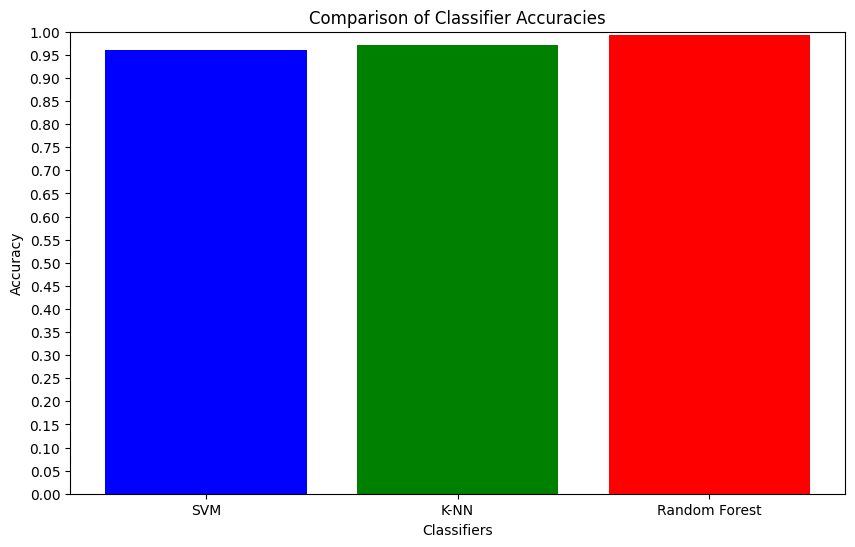

In [18]:
#Visualise Results
classifiers = ['SVM', 'K-NN', 'Random Forest']
accuracies = [SVM_Metrics['acc'], Knn_Metrics['acc'], rnd_forest_Metrics['acc']]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)
plt.yticks([i/100.0 for i in range(0, 101, 5)])
plt.show()